#Sixth Assignment


In [1]:
#loading libraries
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#loading libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


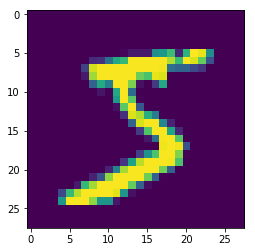

In [4]:
#plotting random image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#resizing the images to 28x28x1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
#normalizing  the pixles
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=0.131 (0.308), test=0.133 (0.310)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [67]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1),name="conv1")) # 26  #3
#model.add(BatchNormalization())
model.add(Activation( 'relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,name="conv2")) # 24   #5
model.add(BatchNormalization())
model.add(Activation( 'relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,name="conv3"))  
model.add(BatchNormalization())
model.add(Activation( 'relu'))

model.add(Dropout(0.1))

#model.add(Convolution2D(10, 1, 1, activation='relu')) # 22
model.add(MaxPooling2D(pool_size=(2, 2))) # 11     ## 14

model.add(Convolution2D(8, 3, 3,name="conv4")) # 9   #16
model.add(BatchNormalization())
model.add(Activation( 'relu'))
model.add(Dropout(0.1))
 
model.add(Convolution2D(16, 3, 3,name="conv5")) # 7 #18
model.add(BatchNormalization())
model.add(Activation( 'relu'))         
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,name="conv6")) # 5 #20
model.add(BatchNormalization())
model.add(Activation( 'relu'))                        
model.add(Dropout(0.1))
#model.add(Convolution2D(10, 1, 1, activation='relu')) 


model.add(Convolution2D(10, 5)) # 1x10

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., name="conv1")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), name="conv2")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), name="conv3")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), name="conv4")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), name="conv5")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Co

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 8)         80        
_________________________________________________________________
activation_51 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_36 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_52 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 24, 24, 16)        0         
__________

#Custom Loss Function

In [0]:
def custom_loss(actual, predicted):
  weights = model.get_weights()
  sum_weights = 0
  for i in range(len(weights)):
    sum_weights +=  np.sum(np.sum(np.sum(np.square(weights[i]))))
    
  hyperparameter = 1e-3
  l2_regularizer = hyperparameter*sum_weights/(2*128)
  return keras.losses.categorical_crossentropy(actual, predicted) + l2_regularizer
  
  
  
  

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [75]:
print(len(model.get_weights()))

34


In [0]:
#for layers in model.layers:
#  print(layers.get_weights())

#Using Data generator for model fitting

In [87]:
#fitting the model over train set and also checking the accuracy simultanously
# fits the model on batches with real-time data augmentation:

filepath = "/content/gdrive/My Drive/Deepak-{epoch:02d}-{val_acc:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
lr = LearningRateScheduler(scheduler, verbose=1)

callbacks_list = [checkpoint,lr]

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                     epochs=5,steps_per_epoch=np.ceil(len(X_train) / 128),validation_data=(X_test, Y_test),validation_steps=np.ceil(len(X_test)/128),
                    callbacks=[checkpoint,lr])


#model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/5

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 12s 26ms/step - loss: 0.0371 - acc: 0.9898 - val_loss: 0.0698 - val_acc: 0.9790

Epoch 00001: val_acc improved from -inf to 0.97900, saving model to /content/gdrive/My Drive/Deepak-01-0.98.hdf5
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 12s 26ms/step - loss: 0.0312 - acc: 0.9918 - val_loss: 0.1053 - val_acc: 0.9698

Epoch 00002: val_acc did not improve from 0.97900
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 12s 26ms/step - loss: 0.0286 - acc: 0.9929 - val_loss: 0.0748 - val_acc: 0.9765

Epoch 00003: val_acc did not improve from 0.97900
Epoch 4/5

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 12s 26ms/step - loss: 0.0270 - acc: 0.9

In [0]:

#score = model.evaluate(X_test, Y_test, verbose=0)
y_pred = model.predict(X_test)
mis_class = []
for i in range(len(y_pred)):
  
  pred = np.argmax(y_pred[i])
  orig_pred = np.argmax(Y_test[i])
  if(pred != orig_pred):
    mis_class.append(i)
  
  

#misclassified images

original image  5  predicted  8


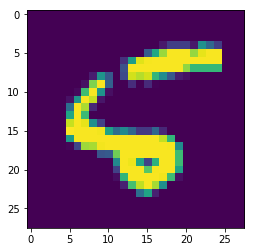

original image  5  predicted  8


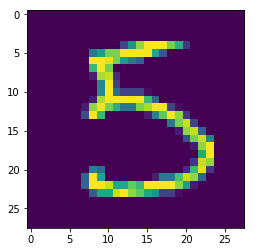

original image  3  predicted  8


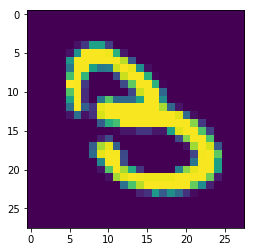

original image  5  predicted  8


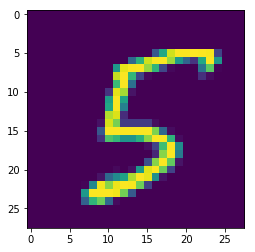

original image  2  predicted  4


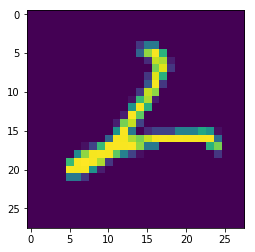

original image  5  predicted  8


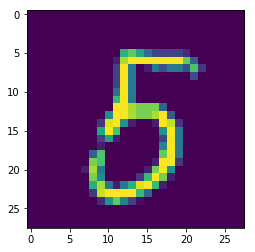

original image  1  predicted  7


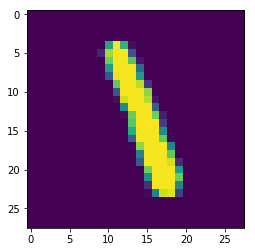

original image  5  predicted  8


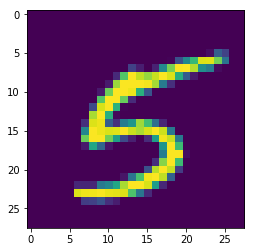

original image  5  predicted  8


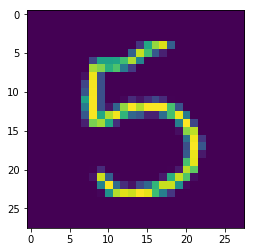

original image  5  predicted  9


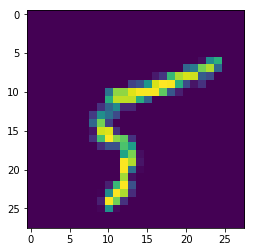

original image  9  predicted  4


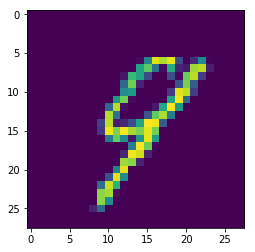

original image  5  predicted  8


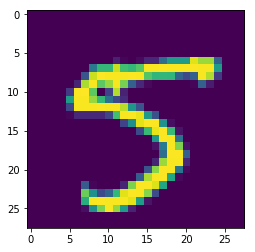

original image  5  predicted  8


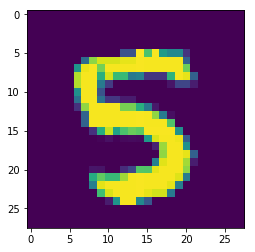

original image  5  predicted  8


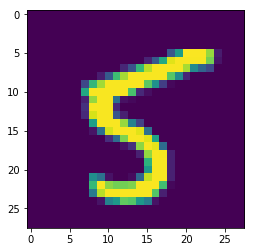

original image  5  predicted  8


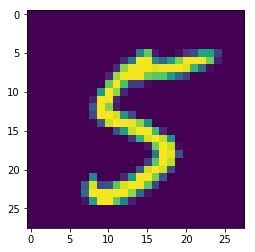

original image  5  predicted  8


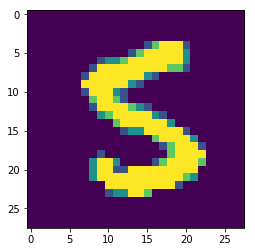

original image  2  predicted  8


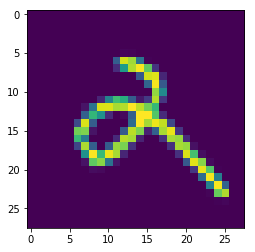

original image  5  predicted  9


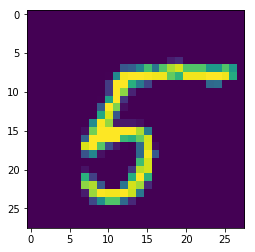

original image  5  predicted  8


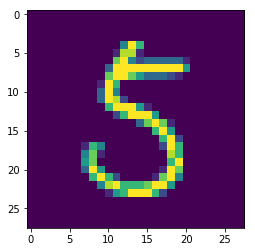

original image  5  predicted  8


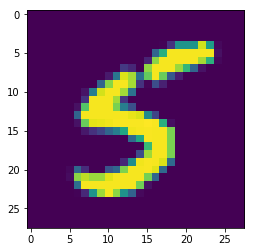

original image  3  predicted  0


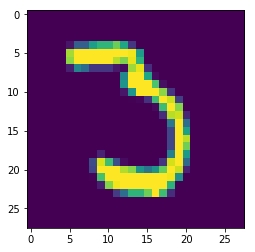

original image  5  predicted  8


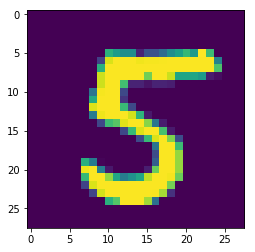

original image  5  predicted  8


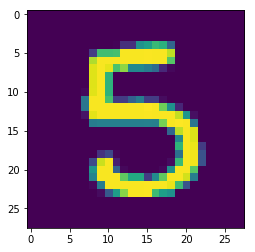

original image  5  predicted  4


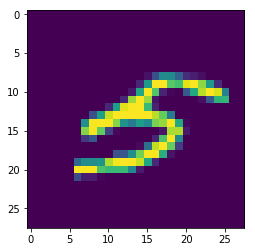

original image  7  predicted  1


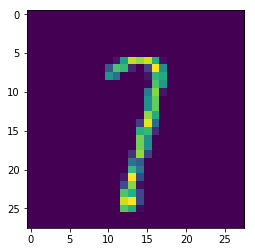

In [45]:
i=0
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
for j in range(len(mis_class)):
  img = cv2.resize(X_test[mis_class[j]],(28,28))
  imgplot = plt.imshow(img)
  print("original image ",y_test[mis_class[j]], " predicted ",np.argmax(y_pred[mis_class[j]]))
  plt.show()
  i += 1
  if(i==25):
    break
  

In [40]:
X_test[mis_class[1]].shape

(28, 28, 1)